In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# link to dataset: https://www.kaggle.com/datasets/samdeeplearning/vt-nh-real-estate

In [2]:
df = pd.read_csv('real_estate_data_DS201.csv')

In [3]:
df

,id,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,...,rooms_total,garage,flood_zone,easements,current_use,covenants,common_land_acres,basement_access_type,basement,price_closed
0,1,3,3,1.58,3740,11044.0,538200.0,2.0,591 Church Hill Road,Woodstock,...,14,Yes,No,NaN,No,Unknown,NaN,Interior,Yes,495000
1,2,4,3,5.19,2276,13438.0,696500.0,2.0,354 Grove Hill Rd,Woodstock,...,9,Yes,No,NaN,NaN,No,NaN,Walkout,No,540000
2,3,4,3,0.84,2200,6361.0,329700.0,1.0,4 Prospect,Woodstock,...,10,Yes,No,NaN,No,No,NaN,Interior,Yes,460000
3,4,3,3,15.40,2926,11829.0,697600.0,2.0,529 Stage Road,Pomfret,...,7,Yes,No,Yes,No,Yes,NaN,Interior,Yes,500000
4,5,4,5,4.00,2817,10707.0,512100.0,2.0,283 Laughlin,Woodstock,...,6,Yes,No,NaN,NaN,Yes,NaN,Interior,Yes,605914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,3,3,8.10,1872,6837.0,337900.0,0.0,24 Austin Road,Woodstock,...,6,No,No,NaN,No,No,NaN,NaN,No,310000
133,134,3,2,5.62,2256,6411.0,353600.0,1.0,108 Peterkin Hill Road,Woodstock,...,10,Yes,Unknown,NaN,No,Unknown,NaN,NaN,Yes,305000
134,135,6,8,5.50,7783,15867.0,421700.0,0.0,2709 Woodstock Road,Woodstock,...,11,No,Yes,Yes,No,Yes,NaN,NaN,Yes,415000
135,136,5,3,58.10,4080,18957.0,1041270.0,2.0,3862 Pomfret Road,Pomfret,...,10,Yes,No,NaN,Yes,No,NaN,Walk-up,Yes,750000


# Cleaning the data

In [4]:
duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [id, bedrooms_total, baths_total, acres, sq_ft_tot_fn, tax_gross_amount, assessment_value_town, garage_capacity, address, city, garage_type, year_built, total_stories, surveyed, seasonal, water_body_type, water_frontage_length, short_sale, rooms_total, garage, flood_zone, easements, current_use, covenants, common_land_acres, basement_access_type, basement, price_closed]
Index: []

[0 rows x 28 columns]


In [5]:
duplicateRows = df[df.duplicated('address')]

In [6]:
result = df.iloc[[21, 97], 8]
print(result)

21    529 Stage Road
97    19 Garnet Hill
Name: address, dtype: object


In [7]:
df['tax_gross_amount'].unique()

array([11044., 13438.,  6361., 11829., 10707.,    nan, 18277.,  6708.,
       10459., 15047., 13144.,  7297.,  7148., 10476., 36389., 15202.,
        8100., 13260., 12915.,  5495., 10766., 17153., 12637., 45702.,
        5819.,  7069., 11660.,  6736.,  6953., 38108.,  8749.,  4441.,
        9794.,  5709.,  7627., 12542.,  8792., 23572.,  9339., 19463.,
       14691.,  9567.,  9367.,  6751.,  6237., 10372.,  9446.,  7254.,
       12114., 10434.,  8137., 12301.,  7955., 12317.,  7243., 16923.,
       11543., 12614.,  8080.,  7643.,  5448.,  7259.,  9062.,  7542.,
       10137., 29997.,  9022., 30855.,  9211.,  5844., 11927.,  7882.,
        9683.,  4671., 25418., 16054.,  8271., 37803., 12976.,  4480.,
       22119.,  9423., 21510.,  9814., 36669., 13177., 10339., 14297.,
        7353., 12249., 11581., 30155.,  8776.,  5964.,  5748., 11391.,
        7139.,  6199., 10602., 15883., 43180., 10727., 27757.,  6892.,
        6741., 21894., 17275., 22730., 12906.,  8886.,  8428.,  7781.,
      

In [8]:
df[df['tax_gross_amount'].isnull()] 

,id,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,...,rooms_total,garage,flood_zone,easements,current_use,covenants,common_land_acres,basement_access_type,basement,price_closed
5,6,5,3,54.07,4030,NaN,1460710.0,4.0,121 Gills Rd,Barnard,...,12,Yes,No,NaN,Yes,Yes,NaN,Interior,Yes,1000000
12,13,4,3,163.10,4154,NaN,1356440.0,3.0,1510 Wayside Road,Barnard,...,12,Yes,Unknown,NaN,No,No,NaN,Walkout,Yes,1450000
23,24,1,1,67.96,1272,NaN,2155650.0,2.0,480 Thistle Hill Road,Pomfret,...,5,Yes,No,NaN,NaN,Unknown,NaN,Interior,Yes,350000
51,52,4,4,249.50,4740,NaN,3886250.0,3.0,1710 Wild Apple Road,Pomfret,...,12,Yes,No,Yes,Yes,Yes,NaN,Interior,Yes,3400000
65,66,3,2,4.65,2100,NaN,393470.0,2.0,659 Barber Hill,Pomfret,...,7,Yes,No,Yes,NaN,Unknown,NaN,Interior,Yes,300000
127,128,3,3,NaN,2164,NaN,112500.0,NaN,230 Labounty,Pomfret,...,7,Yes,No,NaN,NaN,No,NaN,NaN,NaN,330000


In [9]:
df = df.drop([5])
df = df.drop([12])
df = df.drop([23])
df = df.drop([51])
df = df.drop([65])
df = df.drop([127])
df.head(10)

,id,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,...,rooms_total,garage,flood_zone,easements,current_use,covenants,common_land_acres,basement_access_type,basement,price_closed
0,1,3,3,1.58,3740,11044.0,538200.0,2.0,591 Church Hill Road,Woodstock,...,14,Yes,No,NaN,No,Unknown,NaN,Interior,Yes,495000
1,2,4,3,5.19,2276,13438.0,696500.0,2.0,354 Grove Hill Rd,Woodstock,...,9,Yes,No,NaN,NaN,No,NaN,Walkout,No,540000
2,3,4,3,0.84,2200,6361.0,329700.0,1.0,4 Prospect,Woodstock,...,10,Yes,No,NaN,No,No,NaN,Interior,Yes,460000
3,4,3,3,15.40,2926,11829.0,697600.0,2.0,529 Stage Road,Pomfret,...,7,Yes,No,Yes,No,Yes,NaN,Interior,Yes,500000
4,5,4,5,4.00,2817,10707.0,512100.0,2.0,283 Laughlin,Woodstock,...,6,Yes,No,NaN,NaN,Yes,NaN,Interior,Yes,605914
6,7,4,4,23.80,2780,18277.0,756570.0,0.0,633 North Road,Barnard,...,9,No,No,NaN,NaN,No,NaN,Interior,Yes,875000
7,8,3,3,10.33,2200,6708.0,NaN,1.0,700 John Darling Road,Woodstock,...,7,Yes,No,NaN,NaN,No,NaN,Walkout,Yes,300000
8,9,4,4,0.29,3324,10459.0,731280.0,0.0,50 NORTH RD,Barnard,...,11,No,Unknown,NaN,No,Unknown,NaN,Interior,Yes,537500
9,10,5,2,1.30,3732,15047.0,1140000.0,1.0,37 Elm Street,Woodstock,...,11,Yes,Yes,NaN,NaN,No,NaN,NaN,Yes,825000
10,11,3,3,24.10,2309,13144.0,681300.0,3.0,441 Spruce Way,Woodstock,...,8,Yes,No,NaN,No,Yes,NaN,NaN,No,680000


In [10]:
df['assessment_value_town'].unique()

array([5.38200e+05, 6.96500e+05, 3.29700e+05, 6.97600e+05, 5.12100e+05,
       7.56570e+05,         nan, 7.31280e+05, 1.14000e+06, 6.81300e+05,
       4.56000e+05, 3.70500e+05, 9.16770e+05, 8.32100e+05, 8.34980e+05,
       3.35200e+05, 6.87300e+05, 8.32500e+05, 3.16300e+05, 5.91330e+05,
       8.89100e+05, 6.37900e+05, 1.54381e+06, 3.01600e+05, 3.38100e+05,
       7.08670e+05, 3.89600e+05, 2.89310e+06, 4.53000e+05, 5.13141e+05,
       2.95900e+05, 3.72900e+05, 6.57080e+05, 3.84300e+05, 9.08270e+05,
       4.89310e+05, 9.30900e+05, 5.30000e+05, 4.85500e+05, 3.22900e+05,
       5.37600e+05, 5.35500e+05, 3.33500e+05, 6.27900e+05, 5.40800e+05,
       4.62500e+05, 6.37600e+05, 4.12300e+05, 6.76550e+05, 3.75400e+05,
       5.98300e+05, 6.60890e+05, 4.18800e+05, 3.73690e+05, 2.82400e+05,
       3.47200e+05, 4.81300e+05, 3.90900e+05, 5.25400e+05, 1.64762e+06,
       4.31500e+05, 1.69478e+06, 4.62760e+05, 2.26200e+05, 6.55090e+05,
       4.33400e+05, 6.69900e+05, 3.12450e+05, 1.21570e+06, 1.918

In [11]:
df[df['assessment_value_town'].isnull()] 

,id,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,...,rooms_total,garage,flood_zone,easements,current_use,covenants,common_land_acres,basement_access_type,basement,price_closed
7,8,3,3,10.33,2200,6708.0,NaN,1.0,700 John Darling Road,Woodstock,...,7,Yes,No,NaN,NaN,No,NaN,Walkout,Yes,300000
30,31,3,2,9.88,1800,6953.0,NaN,0.0,6603 Dunham Hill,Woodstock,...,9,No,Unknown,NaN,No,Unknown,NaN,Walkout,Yes,380000
33,34,2,2,74.89,800,4441.0,NaN,0.0,342 Rolling Ridge Drive,Pomfret,...,4,No,Unknown,NaN,Yes,No,NaN,NaN,NaN,850000
42,43,4,5,0.89,4000,14691.0,NaN,2.0,4 Pine St.,Woodstock,...,11,Yes,No,NaN,No,No,NaN,Walkout,Yes,737500
46,47,3,2,5.00,1232,6237.0,NaN,2.0,2111 Austin Road,Woodstock,...,6,Yes,No,NaN,No,No,NaN,Walkout,Yes,320000
58,59,4,5,2.61,4050,16923.0,NaN,2.0,798 Thomas Hill Rd,Woodstock,...,8,Yes,No,NaN,No,No,NaN,NaN,Yes,750000
103,104,4,3,20.02,3128,15883.0,NaN,22.0,1321 Old River Road,Woodstock,...,10,Yes,No,NaN,NaN,No,NaN,Walkout,Yes,1100000
104,105,10,9,2.43,8600,43180.0,NaN,6.0,000 Mountain Ave,Woodstock,...,20,Yes,No,NaN,NaN,No,NaN,Interior,Yes,2500000


In [12]:
df = df.drop([7])
df = df.drop([30])
df = df.drop([33])
df = df.drop([42])
df = df.drop([46])
df = df.drop([58])
df = df.drop([103])
df = df.drop([104])

In [13]:
df['assessment_value_town'].unique()

array([5.38200e+05, 6.96500e+05, 3.29700e+05, 6.97600e+05, 5.12100e+05,
       7.56570e+05, 7.31280e+05, 1.14000e+06, 6.81300e+05, 4.56000e+05,
       3.70500e+05, 9.16770e+05, 8.32100e+05, 8.34980e+05, 3.35200e+05,
       6.87300e+05, 8.32500e+05, 3.16300e+05, 5.91330e+05, 8.89100e+05,
       6.37900e+05, 1.54381e+06, 3.01600e+05, 3.38100e+05, 7.08670e+05,
       3.89600e+05, 2.89310e+06, 4.53000e+05, 5.13141e+05, 2.95900e+05,
       3.72900e+05, 6.57080e+05, 3.84300e+05, 9.08270e+05, 4.89310e+05,
       9.30900e+05, 5.30000e+05, 4.85500e+05, 3.22900e+05, 5.37600e+05,
       5.35500e+05, 3.33500e+05, 6.27900e+05, 5.40800e+05, 4.62500e+05,
       6.37600e+05, 4.12300e+05, 6.76550e+05, 3.75400e+05, 5.98300e+05,
       6.60890e+05, 4.18800e+05, 3.73690e+05, 2.82400e+05, 3.47200e+05,
       4.81300e+05, 3.90900e+05, 5.25400e+05, 1.64762e+06, 4.31500e+05,
       1.69478e+06, 4.62760e+05, 2.26200e+05, 6.55090e+05, 4.33400e+05,
       6.69900e+05, 3.12450e+05, 1.21570e+06, 1.91880e+06, 8.990

In [14]:
df['garage_type'].unique()

array(['Under', 'Detached', 'Carport', 'Attached', nan], dtype=object)

In [15]:
df['garage_type'] = df['garage_type'].fillna('Unknown')

In [16]:
df['water_body_type'].unique()

array([nan, 'Brook', 'Lake', 'Pond', 'River'], dtype=object)

In [17]:
df['water_body_type'] = df['water_body_type'].fillna('None')

In [18]:
df['water_frontage_length'] = df['water_frontage_length'].fillna(0)

In [19]:
df['short_sale'].unique()

array(['No', nan], dtype=object)

In [20]:
df = df.drop(columns=['seasonal'])

In [21]:
df['easements'].unique()

array([nan, 'Yes'], dtype=object)

In [22]:
df[df['easements']=='Yes'] 

,id,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,...,rooms_total,garage,flood_zone,easements,current_use,covenants,common_land_acres,basement_access_type,basement,price_closed
3,4,3,3,15.40,2926,11829.0,697600.0,2.0,529 Stage Road,Pomfret,...,7,Yes,No,Yes,No,Yes,NaN,Interior,Yes,500000
14,15,4,4,43.00,3400,10476.0,916770.0,3.0,253 North Road,Barnard,...,8,Yes,No,Yes,Yes,No,NaN,Walkout,Yes,930000
16,17,4,4,23.00,3500,15202.0,834980.0,2.0,1162 Galaxy Hill,Pomfret,...,9,Yes,No,Yes,No,Unknown,NaN,Walkout,Yes,700000
21,22,3,3,15.40,2926,10766.0,591330.0,2.0,529 Stage Road,Pomfret,...,9,Yes,No,Yes,NaN,No,NaN,Interior,Yes,575000
27,28,2,2,4.10,1550,7069.0,338100.0,0.0,3827 Hartland Hill Road,Woodstock,...,9,No,No,Yes,NaN,Yes,NaN,Interior,Yes,400000
32,33,3,2,11.41,2016,8749.0,453000.0,2.0,3480 Hartland Hill Road,Woodstock,...,7,Yes,No,Yes,No,No,NaN,Interior,Yes,390000
38,39,5,4,2.84,3284,8792.0,384300.0,2.0,2605 Cox District Rd,Woodstock,...,12,Yes,No,Yes,NaN,Yes,NaN,NaN,Yes,372500
50,51,4,1,47.50,1896,12114.0,627900.0,0.0,63 Brooks Bungalow Road,Woodstock,...,9,No,No,Yes,NaN,Yes,NaN,Interior,Yes,500000
55,56,2,2,5.39,1854,7955.0,412300.0,0.0,314 Meadow Way,Woodstock,...,6,No,No,Yes,NaN,Yes,NaN,NaN,No,470000
91,92,3,4,2.37,3200,14297.0,696500.0,2.0,7802 Sawyer,Woodstock,...,9,Yes,No,Yes,No,No,NaN,Walkout,Yes,500000


In [23]:
df['easements'] = df['easements'].fillna('No')

In [24]:
df['current_use'] = df['current_use'].fillna('Unknown')

In [25]:
df = df.drop(columns=['common_land_acres'])

In [26]:
df['short_sale'].unique()

array(['No', nan], dtype=object)

In [27]:
df = df.drop(columns=['short_sale'])

In [28]:
df['basement_access_type'] = df['basement_access_type'].fillna('None')

In [29]:
df['garage'] = df['garage'].fillna('None')
df['garage_type'].unique()

array(['Under', 'Detached', 'Carport', 'Attached', 'Unknown'],
      dtype=object)

In [30]:
df[df['basement'].isnull()]

,id,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,...,water_frontage_length,rooms_total,garage,flood_zone,easements,current_use,covenants,basement_access_type,basement,price_closed
124,125,4,3,0.35,2552,13211.0,644400.0,2.0,10 High Street,Woodstock,...,0,12,Yes,No,No,Unknown,Unknown,None,NaN,550000


In [31]:
df = df.drop([124])

In [32]:
df['garage_type'] = df['garage_type'].fillna('Unknown')

In [33]:
df.columns.tolist()

['id',
 'bedrooms_total',
 'baths_total',
 'acres',
 'sq_ft_tot_fn',
 'tax_gross_amount',
 'assessment_value_town',
 'garage_capacity',
 'address',
 'city',
 'garage_type',
 'year_built',
 'total_stories',
 'surveyed',
 'water_body_type',
 'water_frontage_length',
 'rooms_total',
 'garage',
 'flood_zone',
 'easements',
 'current_use',
 'covenants',
 'basement_access_type',
 'basement',
 'price_closed']

In [34]:
df.at[93,'water_frontage_length'] = 1228
df.at[106,'water_frontage_length'] = 1228
df.at[119,'water_frontage_length'] = 1047
df.at[134,'water_frontage_length'] = 1047

In [35]:
df[df['water_frontage_length']=='1,047']

,id,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,...,water_frontage_length,rooms_total,garage,flood_zone,easements,current_use,covenants,basement_access_type,basement,price_closed


In [36]:
df['water_frontage_length'] = pd.to_numeric(df['water_frontage_length'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 136
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     122 non-null    int64  
 1   bedrooms_total         122 non-null    int64  
 2   baths_total            122 non-null    int64  
 3   acres                  122 non-null    float64
 4   sq_ft_tot_fn           122 non-null    int64  
 5   tax_gross_amount       122 non-null    float64
 6   assessment_value_town  122 non-null    float64
 7   garage_capacity        122 non-null    float64
 8   address                122 non-null    object 
 9   city                   122 non-null    object 
 10  garage_type            122 non-null    object 
 11  year_built             122 non-null    int64  
 12  total_stories          122 non-null    float64
 13  surveyed               122 non-null    object 
 14  water_body_type        122 non-null    object 
 15  water_

In [38]:
df.head()

,id,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,...,water_frontage_length,rooms_total,garage,flood_zone,easements,current_use,covenants,basement_access_type,basement,price_closed
0,1,3,3,1.58,3740,11044.0,538200.0,2.0,591 Church Hill Road,Woodstock,...,0,14,Yes,No,No,No,Unknown,Interior,Yes,495000
1,2,4,3,5.19,2276,13438.0,696500.0,2.0,354 Grove Hill Rd,Woodstock,...,0,9,Yes,No,No,Unknown,No,Walkout,No,540000
2,3,4,3,0.84,2200,6361.0,329700.0,1.0,4 Prospect,Woodstock,...,0,10,Yes,No,No,No,No,Interior,Yes,460000
3,4,3,3,15.40,2926,11829.0,697600.0,2.0,529 Stage Road,Pomfret,...,0,7,Yes,No,Yes,No,Yes,Interior,Yes,500000
4,5,4,5,4.00,2817,10707.0,512100.0,2.0,283 Laughlin,Woodstock,...,0,6,Yes,No,No,Unknown,Yes,Interior,Yes,605914


In [39]:
df.columns

Index(['id', 'bedrooms_total', 'baths_total', 'acres', 'sq_ft_tot_fn',
       'tax_gross_amount', 'assessment_value_town', 'garage_capacity',
       'address', 'city', 'garage_type', 'year_built', 'total_stories',
       'surveyed', 'water_body_type', 'water_frontage_length', 'rooms_total',
       'garage', 'flood_zone', 'easements', 'current_use', 'covenants',
       'basement_access_type', 'basement', 'price_closed'],
      dtype='object')

Create a new column that shows how old the house is (assuming this data is from 2017)

In [40]:
df['house_age'] = 2017 - df['year_built']

In [41]:
df['house_age']

0       47
1       27
2      217
3       22
4       49
      ... 
132     12
133     16
134    142
135    167
136     31
Name: house_age, Length: 122, dtype: int64

In [42]:
df2 = df[[
 'bedrooms_total',
 'baths_total',
 'acres',
 'sq_ft_tot_fn',
 'tax_gross_amount',
 'assessment_value_town',
 'garage_capacity',
 'city',
 'garage_type',
 'house_age',
 'total_stories',
 'water_body_type',
 'water_frontage_length',
 'rooms_total',
 'garage',
 'flood_zone',
 'basement_access_type',
 'basement',
 'price_closed']]
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,house_age,total_stories,water_frontage_length,rooms_total,price_closed
bedrooms_total,1.000,0.633,0.284,0.641,0.537,0.457,0.195,0.368,0.202,0.223,0.639,0.466
baths_total,0.633,1.000,0.330,0.774,0.572,0.474,0.300,0.087,0.277,0.232,0.571,0.500
acres,0.284,0.330,1.000,0.299,0.518,0.385,0.165,0.044,0.086,-0.019,0.205,0.478
sq_ft_tot_fn,0.641,0.774,0.299,1.000,0.710,0.642,0.366,0.168,0.317,0.249,0.724,0.567
tax_gross_amount,0.537,0.572,0.518,0.710,1.000,0.868,0.327,0.162,0.295,0.147,0.539,0.840
assessment_value_town,0.457,0.474,0.385,0.642,0.868,1.000,0.366,0.185,0.341,0.091,0.479,0.758
garage_capacity,0.195,0.300,0.165,0.366,0.327,0.366,1.000,-0.037,0.065,-0.002,0.327,0.359
house_age,0.368,0.087,0.044,0.168,0.162,0.185,-0.037,1.000,0.003,0.119,0.234,0.150
total_stories,0.202,0.277,0.086,0.317,0.295,0.341,0.065,0.003,1.000,0.009,0.265,0.273
water_frontage_length,0.223,0.232,-0.019,0.249,0.147,0.091,-0.002,0.119,0.009,1.000,0.312,0.293


# Creating Plots

Text(0.5, 0, 'house_age')

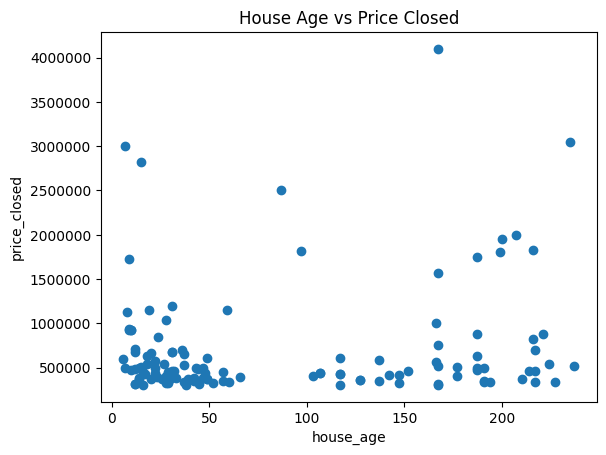

In [43]:
plt.scatter('house_age', 'price_closed', data=df)
plt.ticklabel_format(scilimits=(-5, 8))
plt.title('House Age vs Price Closed')
plt.ylabel('price_closed')
plt.xlabel('house_age')

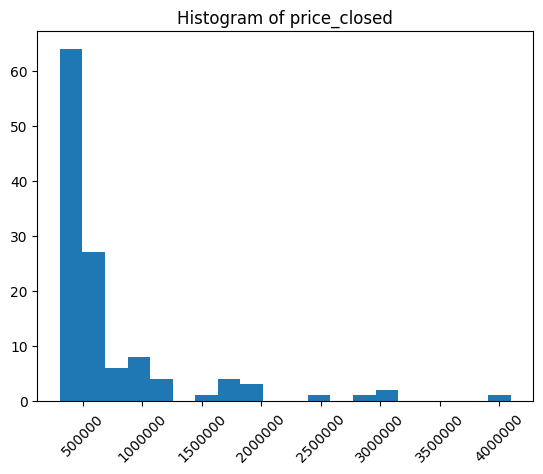

In [44]:
plt.hist(df['price_closed'], bins=20, log=False)
plt.title('Histogram of price_closed')
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.show()

In [45]:
df["price_closed"].describe().apply(lambda x: format(x, 'f'))

count        122.000000
mean      709339.532787
std       632842.335753
min       305000.000000
25%       375000.000000
50%       478000.000000
75%       695000.000000
max      4100000.000000
Name: price_closed, dtype: object

Text(0.5, 1.05, 'Bedrooms, Bathrooms, Total Rooms, and Price Closed')

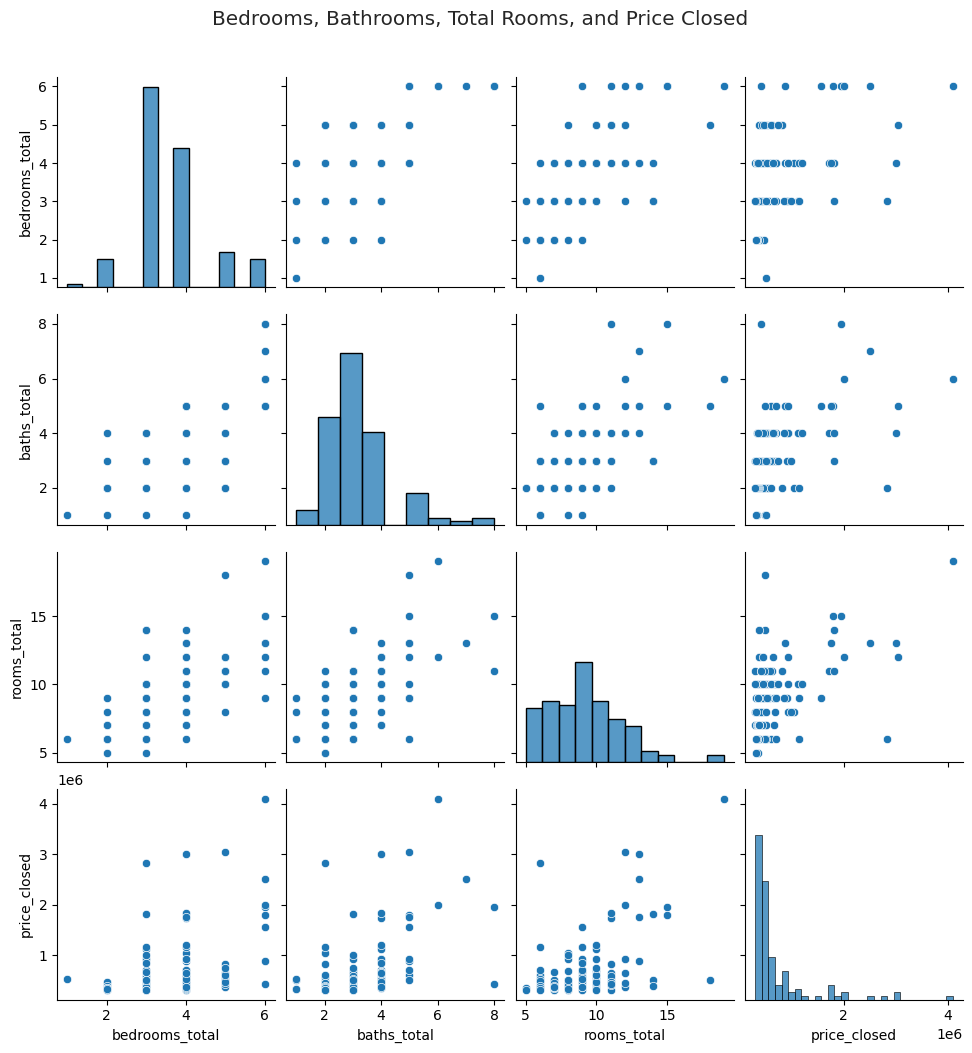

In [46]:
 g = sns.pairplot(
    df,
    diag_kind="hist",
    x_vars=["bedrooms_total", "baths_total", 'rooms_total', "price_closed"],
    y_vars=["bedrooms_total", "baths_total", 'rooms_total', "price_closed"],
)
sns.set_theme(style='white')
g.fig.suptitle("Bedrooms, Bathrooms, Total Rooms, and Price Closed", y=1.05)

In [47]:
df.head()

,id,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,...,rooms_total,garage,flood_zone,easements,current_use,covenants,basement_access_type,basement,price_closed,house_age
0,1,3,3,1.58,3740,11044.0,538200.0,2.0,591 Church Hill Road,Woodstock,...,14,Yes,No,No,No,Unknown,Interior,Yes,495000,47
1,2,4,3,5.19,2276,13438.0,696500.0,2.0,354 Grove Hill Rd,Woodstock,...,9,Yes,No,No,Unknown,No,Walkout,No,540000,27
2,3,4,3,0.84,2200,6361.0,329700.0,1.0,4 Prospect,Woodstock,...,10,Yes,No,No,No,No,Interior,Yes,460000,217
3,4,3,3,15.40,2926,11829.0,697600.0,2.0,529 Stage Road,Pomfret,...,7,Yes,No,Yes,No,Yes,Interior,Yes,500000,22
4,5,4,5,4.00,2817,10707.0,512100.0,2.0,283 Laughlin,Woodstock,...,6,Yes,No,No,Unknown,Yes,Interior,Yes,605914,49


<AxesSubplot: xlabel='basement', ylabel='price_closed'>

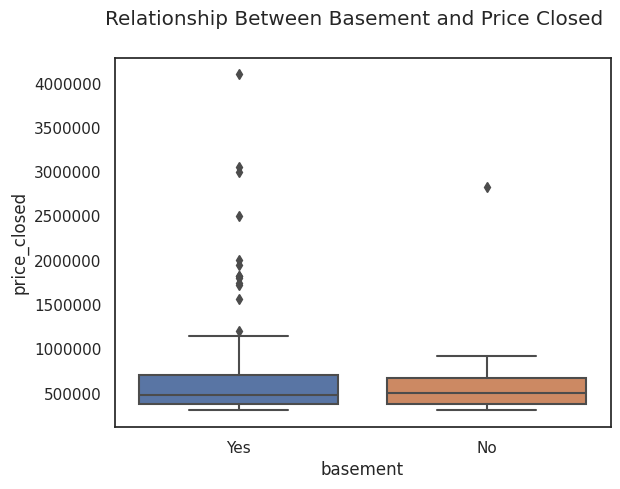

In [48]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Relationship Between Basement and Price Closed')
sns.boxplot(data=df,x="basement",y='price_closed', ax=ax)

<AxesSubplot: xlabel='garage', ylabel='price_closed'>

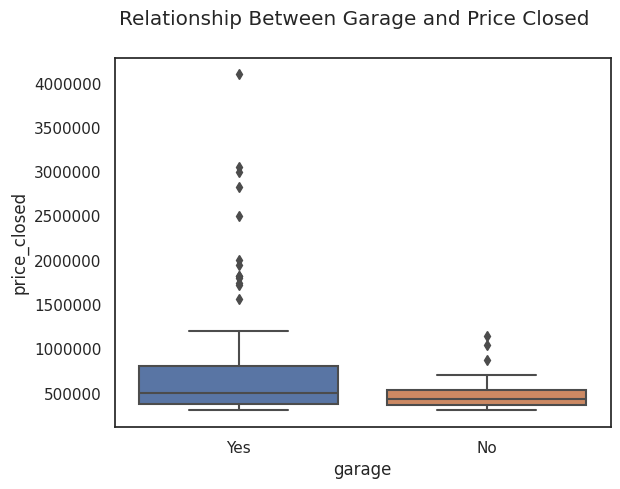

In [49]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Relationship Between Garage and Price Closed')
sns.boxplot(data=df,x="garage",y='price_closed', ax=ax)

<AxesSubplot: xlabel='city', ylabel='price_closed'>

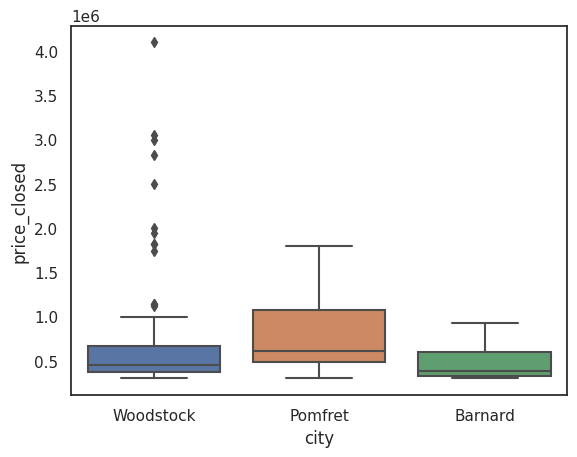

In [50]:
sns.boxplot(data=df,x="city",y='price_closed')

<AxesSubplot: xlabel='total_stories', ylabel='price_closed'>

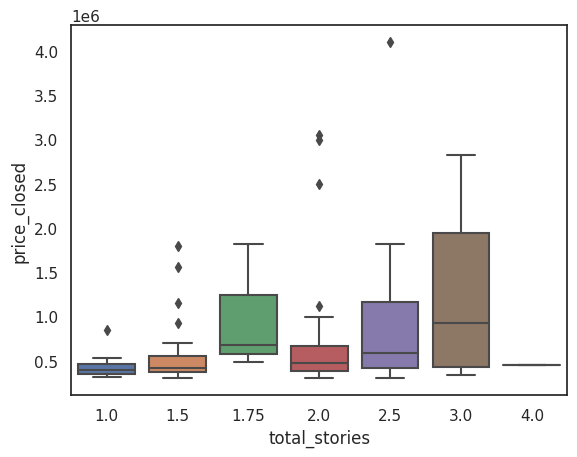

In [51]:
sns.boxplot(data=df,x="total_stories",y='price_closed')

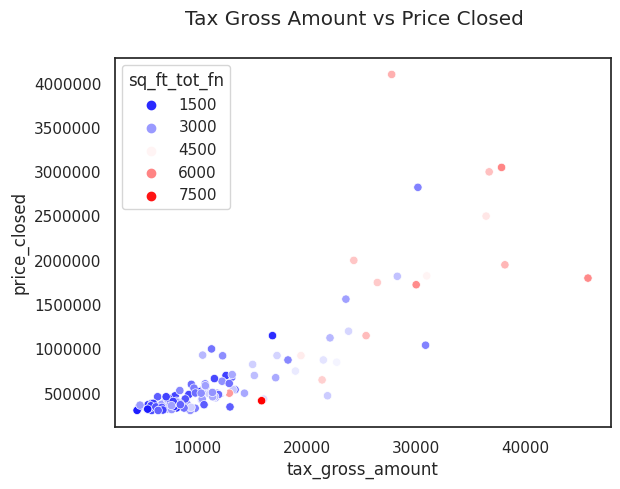

In [52]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Tax Gross Amount vs Price Closed')
g = sns.scatterplot(data=df, x=df['tax_gross_amount'], y=df['price_closed'], hue='sq_ft_tot_fn', size=None, style=None, palette='bwr')
sns.move_legend(g, "upper left", title='sq_ft_tot_fn')

<AxesSubplot: xlabel='assessment_value_town', ylabel='price_closed'>

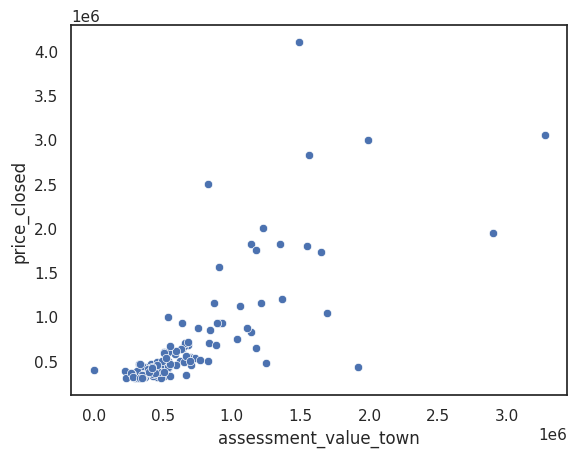

In [53]:
sns.scatterplot(data=df, x=df['assessment_value_town'], y=df['price_closed'], hue=None, size=None, style=None, palette=None)

<AxesSubplot: xlabel='sq_ft_tot_fn', ylabel='price_closed'>

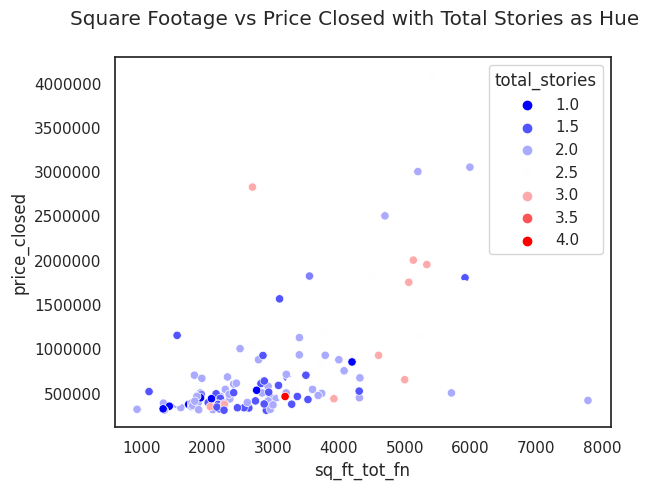

In [54]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Square Footage vs Price Closed with Total Stories as Hue')
sns.scatterplot(data=df, x=df['sq_ft_tot_fn'], y=df['price_closed'], hue=df['total_stories'], size=None, style=None, palette='bwr')

<AxesSubplot: xlabel='flood_zone', ylabel='price_closed'>

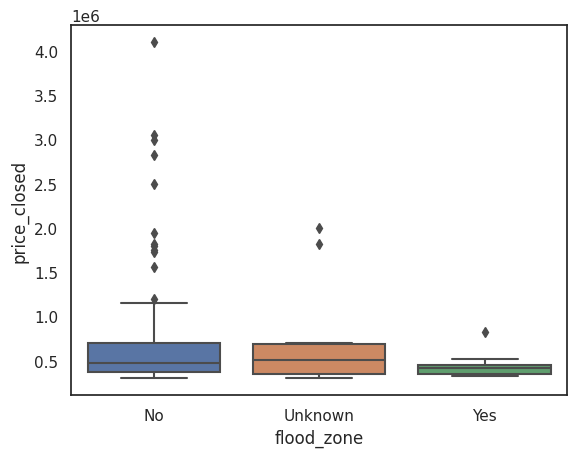

In [55]:
sns.boxplot(data=df,x="flood_zone",y='price_closed')

<AxesSubplot: xlabel='water_body_type', ylabel='price_closed'>

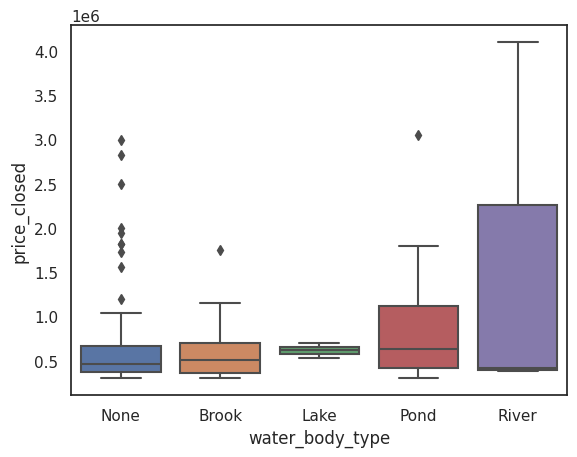

In [56]:
sns.boxplot(data=df,x="water_body_type",y='price_closed')

<AxesSubplot: xlabel='water_frontage_length', ylabel='price_closed'>

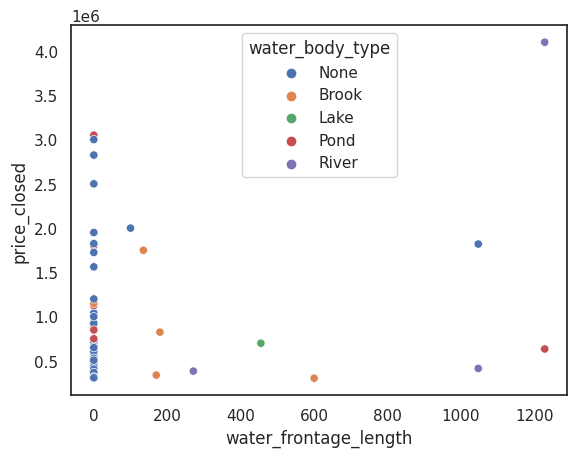

In [57]:
sns.scatterplot(x=df['water_frontage_length'], y=df['price_closed'], hue=df['water_body_type'])

<AxesSubplot: xlabel='water_body_type', ylabel='price_closed'>

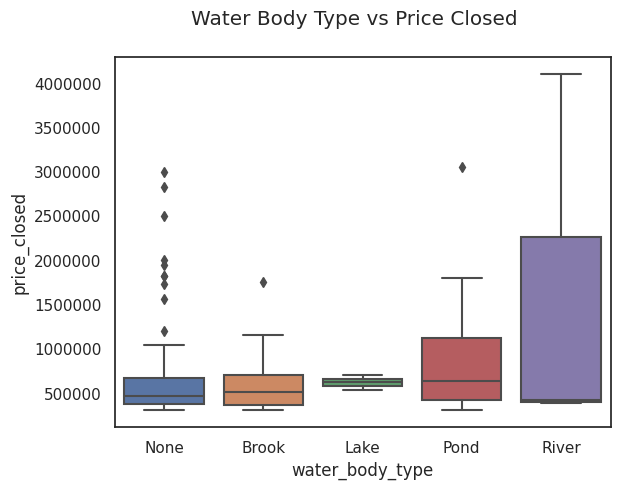

In [58]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Water Body Type vs Price Closed')
sns.boxplot(data=df,x=df["water_body_type"],y=df['price_closed'])

(array([112.,   3.,   1.,   1.,   1.,   0.,   0.,   0.,   2.,   2.]),
 array([   0. ,  122.8,  245.6,  368.4,  491.2,  614. ,  736.8,  859.6,
         982.4, 1105.2, 1228. ]),
 <BarContainer object of 10 artists>)

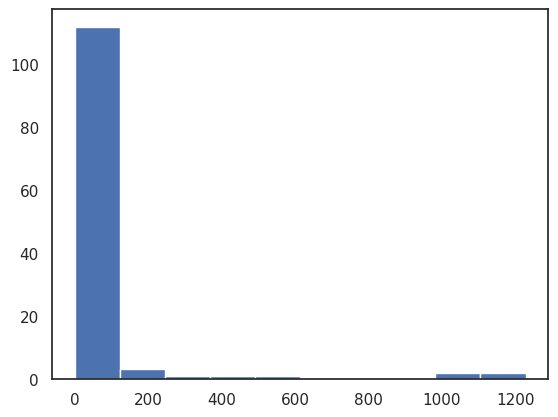

In [59]:
plt.hist(df['water_frontage_length'], bins=10, log=False)


In [60]:
df_categorical = df[['garage_type', 'surveyed', 'water_body_type', 'garage', 'flood_zone', 'easements', 'current_use', 'basement_access_type', 'basement', 'covenants', 'price_closed']]

In [61]:
df['garage_type'].unique()

array(['Under', 'Detached', 'Carport', 'Attached', 'Unknown'],
      dtype=object)

In [62]:
df_categorical.loc[df_categorical['garage_type'] == 'Unknown', 'garage_type'] = 0
df_categorical.loc[df_categorical['garage_type'] == 'Under', 'garage_type'] = 1
df_categorical.loc[df_categorical['garage_type'] == 'Detached', 'garage_type'] = 2
df_categorical.loc[df_categorical['garage_type'] == 'Carport', 'garage_type'] = 3
df_categorical.loc[df_categorical['garage_type'] == 'Attached', 'garage_type'] = 4
df_categorical['garage_type'] = pd.to_numeric(df_categorical['garage_type'])

df_categorical.loc[df_categorical['surveyed'] == 'Yes', 'surveyed'] = 1
df_categorical.loc[df_categorical['surveyed'] == 'No', 'surveyed'] = 0
df_categorical.loc[df_categorical['surveyed'] == 'Unknown', 'surveyed'] = 0
df_categorical['surveyed'] = pd.to_numeric(df_categorical['surveyed'])

df_categorical.loc[df['water_body_type'] == 'None', 'water_body_type'] = 0
df_categorical.loc[df['water_body_type'] == 'Pond', 'water_body_type'] = 1
df_categorical.loc[df['water_body_type'] == 'Lake', 'water_body_type'] = 2
df_categorical.loc[df['water_body_type'] == 'River', 'water_body_type'] = 3
df_categorical.loc[df['water_body_type'] == 'Brook', 'water_body_type'] = 4
df_categorical['water_body_type'] = pd.to_numeric(df_categorical['water_body_type'])

df_categorical.loc[df_categorical['garage'] == 'Yes', 'garage'] = 1
df_categorical.loc[df_categorical['garage'] == 'No', 'garage'] = 0
df_categorical.loc[df_categorical['garage'] == 'Unknown', 'garage'] = 0
df_categorical['garage'] = pd.to_numeric(df_categorical['garage'])

df_categorical.loc[df_categorical['flood_zone'] == 'Yes', 'flood_zone'] = 1
df_categorical.loc[df_categorical['flood_zone'] == 'No', 'flood_zone'] = 0
df_categorical.loc[df_categorical['flood_zone'] == 'Unknown', 'flood_zone'] = 0
df_categorical['flood_zone'] = pd.to_numeric(df_categorical['flood_zone'])

df_categorical.loc[df_categorical['easements'] == 'Yes', 'easements'] = 1
df_categorical.loc[df_categorical['easements'] == 'No', 'easements'] = 0
df_categorical.loc[df_categorical['easements'] == 'Unknown', 'easements'] = 0
df_categorical['easements'] = pd.to_numeric(df_categorical['easements'])

df_categorical.loc[df_categorical['covenants'] == 'Yes', 'covenants'] = 1
df_categorical.loc[df_categorical['covenants'] == 'No', 'covenants'] = 0
df_categorical.loc[df_categorical['covenants'] == 'Unknown', 'covenants'] = 0
df_categorical['covenants'] = pd.to_numeric(df_categorical['covenants'])

df_categorical.loc[df_categorical['current_use'] == 'Yes', 'current_use'] = 1
df_categorical.loc[df_categorical['current_use'] == 'No', 'current_use'] = 0
df_categorical.loc[df_categorical['current_use'] == 'Unknown', 'current_use'] = 0
df_categorical['current_use'] = pd.to_numeric(df_categorical['current_use'])

df_categorical.loc[df_categorical['basement_access_type'] == 'None', 'basement_access_type'] = 0
df_categorical.loc[df_categorical['basement_access_type'] == 'Interior', 'basement_access_type'] = 1
df_categorical.loc[df_categorical['basement_access_type'] == 'Walkout', 'basement_access_type'] = 2
df_categorical.loc[df_categorical['basement_access_type'] == 'Walk-up', 'basement_access_type'] = 3
df_categorical['basement_access_type'] = pd.to_numeric(df_categorical['basement_access_type'])

df_categorical.loc[df_categorical['basement'] == 'Yes', 'basement'] = 1
df_categorical.loc[df_categorical['basement'] == 'No', 'basement'] = 0
df_categorical.loc[df_categorical['basement'] == 'Unknown', 'basement'] = 0
df_categorical['basement'] = pd.to_numeric(df_categorical['basement'])


/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/tmp/ipykernel_83/101530452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['garage_type'] = pd.to_numeric(df_categorical['garage_type'])
/tmp/ipykernel_83/101530452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [63]:
corr_categorical = df_categorical.corr()
corr_categorical = corr_categorical.style.background_gradient(cmap='coolwarm').set_precision(3)
corr_categorical

,garage_type,surveyed,water_body_type,garage,flood_zone,easements,current_use,basement_access_type,basement,covenants,price_closed
garage_type,1.000,0.226,-0.015,0.803,-0.046,-0.043,0.043,-0.073,0.133,0.136,0.147
surveyed,0.226,1.000,0.149,0.169,-0.012,-0.050,0.067,-0.076,-0.128,0.222,0.167
water_body_type,-0.015,0.149,1.000,-0.062,0.389,0.198,0.089,-0.071,0.087,-0.003,0.086
garage,0.803,0.169,-0.062,1.000,-0.092,-0.062,0.086,-0.053,0.147,-0.005,0.181
flood_zone,-0.046,-0.012,0.389,-0.092,1.000,0.180,-0.099,0.044,0.087,-0.074,-0.107
easements,-0.043,-0.050,0.198,-0.062,0.180,1.000,-0.079,-0.128,0.053,0.210,-0.098
current_use,0.043,0.067,0.089,0.086,-0.099,-0.079,1.000,0.107,0.040,-0.156,0.441
basement_access_type,-0.073,-0.076,-0.071,-0.053,0.044,-0.128,0.107,1.000,0.284,-0.108,-0.001
basement,0.133,-0.128,0.087,0.147,0.087,0.053,0.040,0.284,1.000,-0.003,-0.001
covenants,0.136,0.222,-0.003,-0.005,-0.074,0.210,-0.156,-0.108,-0.003,1.000,0.049


In [64]:
df[df['price_closed'] > 1316250]

,id,bedrooms_total,baths_total,acres,sq_ft_tot_fn,tax_gross_amount,assessment_value_town,garage_capacity,address,city,...,rooms_total,garage,flood_zone,easements,current_use,covenants,basement_access_type,basement,price_closed,house_age
15,16,6,7,563.00,4700,36389.0,832100.0,2.0,592 Quinn Road Road,Woodstock,...,13,Yes,No,No,Yes,No,Interior,Yes,2500000,87
25,26,6,5,26.19,5916,45702.0,1543810.0,1.0,1 High Pastures Road,Pomfret,...,15,Yes,No,No,Yes,No,Walkout,Yes,1800000,199
31,32,6,8,121.39,5336,38108.0,2893100.0,2.0,826 Fletcher Schoolhouse Road,Woodstock,...,15,Yes,No,No,No,No,Interior,Yes,1950000,200
39,40,6,5,13.70,3100,23572.0,908270.0,4.0,501 Galaxy Hill Road,Pomfret,...,9,Yes,No,No,Yes,No,Interior,Yes,1562500,167
69,70,4,4,65.00,5904,29997.0,1647620.0,2.0,524 Old Farm Road,Pomfret,...,11,Yes,No,No,No,Yes,Interior,Yes,1725000,9
81,82,5,5,172.62,5990,37803.0,3271300.0,6.0,228 Wyman Lane,Woodstock,...,12,Yes,No,No,Yes,No,Walk-up,Yes,3050000,235
88,89,4,4,42.15,5200,36669.0,1991300.0,2.0,1316 Peterkin Hill Road,Woodstock,...,13,Yes,No,No,Yes,No,Walkout,Yes,3000000,7
95,96,3,2,82.30,2688,30155.0,1563000.0,2.0,1001 Atwood Lane,Woodstock,...,6,Yes,No,No,Yes,No,None,No,2825000,15
106,107,6,6,32.01,5412,27757.0,1491800.0,3.0,587 Old River Rd,Woodstock,...,19,Yes,No,No,Unknown,Yes,Interior,Yes,4100000,167
116,117,6,6,0.72,5131,24295.0,1228000.0,1.0,29 The Green,Woodstock,...,12,Yes,Unknown,Yes,No,Yes,None,Yes,2000000,207


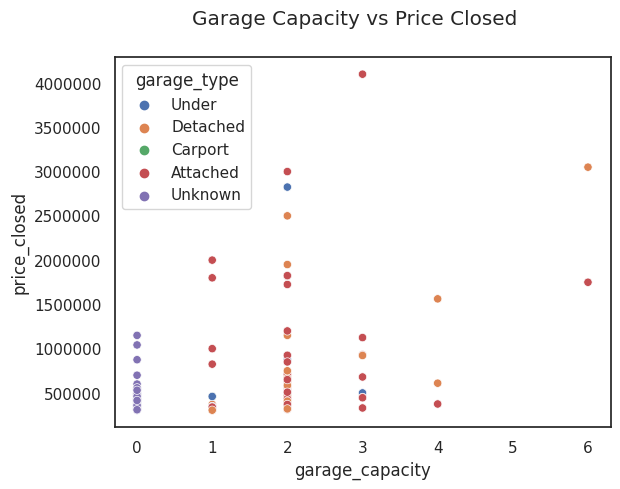

In [65]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Garage Capacity vs Price Closed')
g = sns.scatterplot(data=df, x=df['garage_capacity'], y=df['price_closed'], hue=df['garage_type'])

<AxesSubplot: xlabel='garage_type', ylabel='price_closed'>

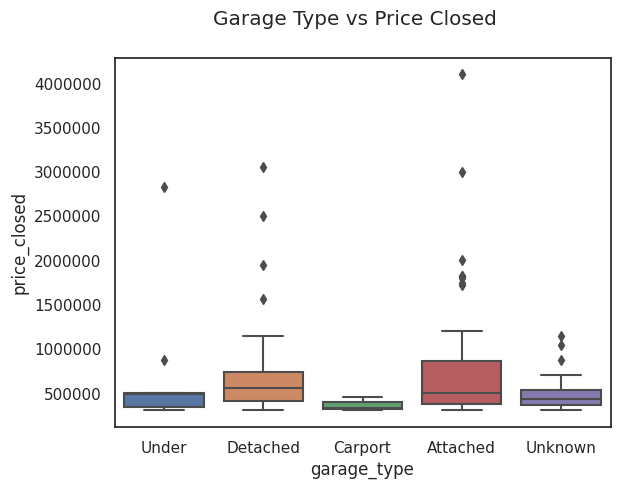

In [66]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Garage Type vs Price Closed')
sns.boxplot(data=df,x=df["garage_type"],y=df['price_closed'])

<AxesSubplot: xlabel='garage', ylabel='price_closed'>

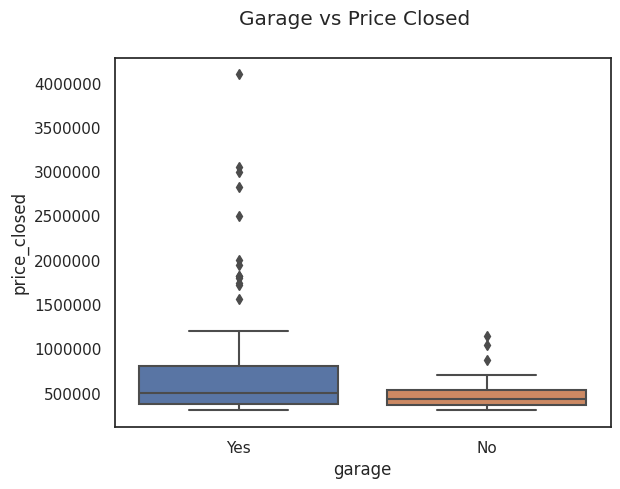

In [67]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Garage vs Price Closed')
sns.boxplot(data=df,x=df["garage"],y=df['price_closed'])

<AxesSubplot: xlabel='basement', ylabel='price_closed'>

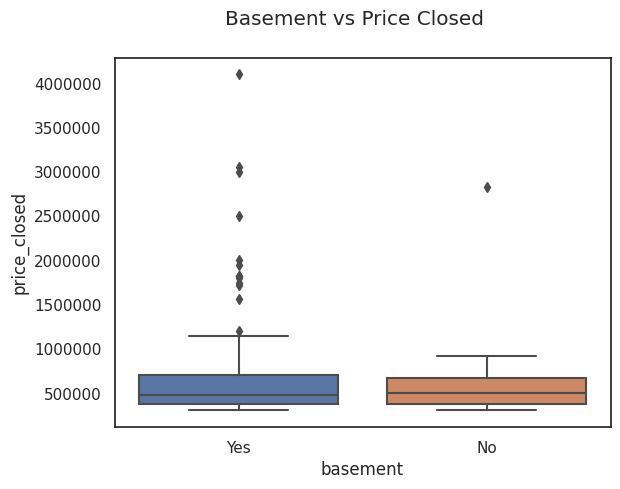

In [68]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Basement vs Price Closed')
sns.boxplot(data=df,x=df["basement"],y=df['price_closed'])

<AxesSubplot: xlabel='basement_access_type', ylabel='price_closed'>

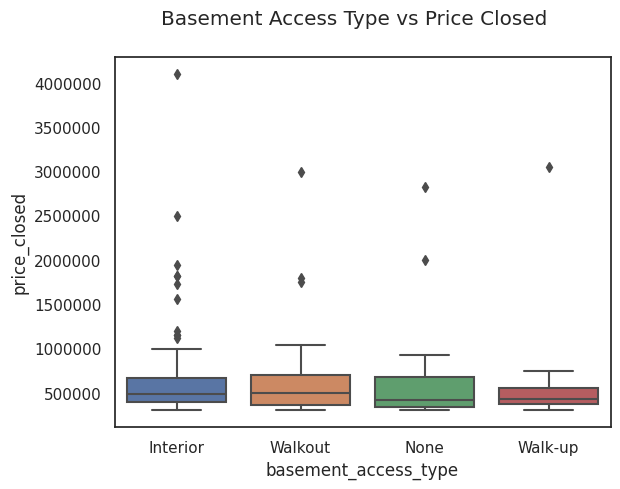

In [69]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Basement Access Type vs Price Closed')
sns.boxplot(data=df,x=df["basement_access_type"],y=df['price_closed'])

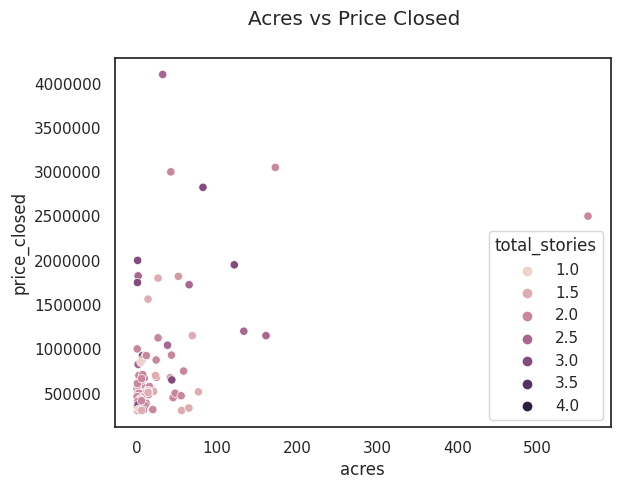

In [70]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Acres vs Price Closed')
g = sns.scatterplot(data=df, x=df['acres'], y=df['price_closed'], hue = df['total_stories'])

In [71]:
df['acres'].max()

563.0

In [72]:
df_drop_acres = df[(df.acres < 563)]

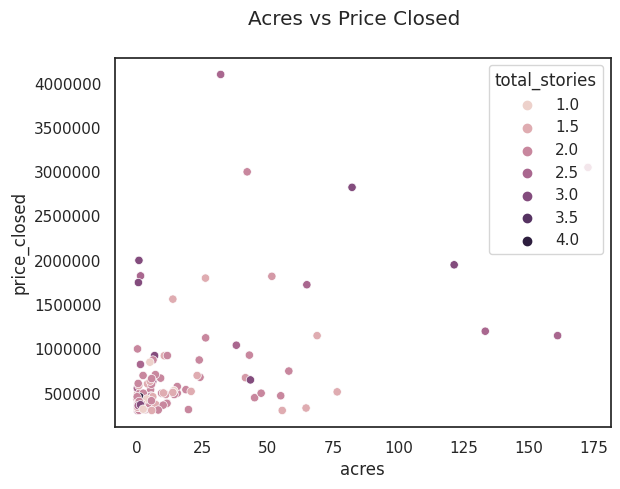

In [73]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Acres vs Price Closed')
g = sns.scatterplot(data=df_drop_acres, x=df_drop_acres['acres'], y=df_drop_acres['price_closed'], hue = df_drop_acres['total_stories'])

Text(0.5, 0.98, 'Distribution of Acres')

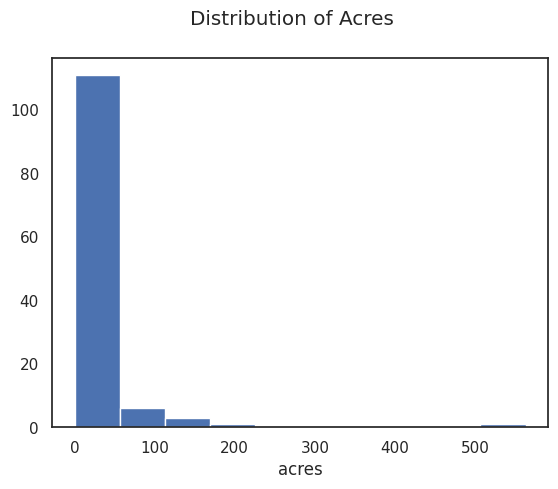

In [74]:
plt.hist(df['acres'], bins=10, log=False)
plt.xlabel('acres')
plt.suptitle('Distribution of Acres')

<AxesSubplot: xlabel='flood_zone', ylabel='price_closed'>

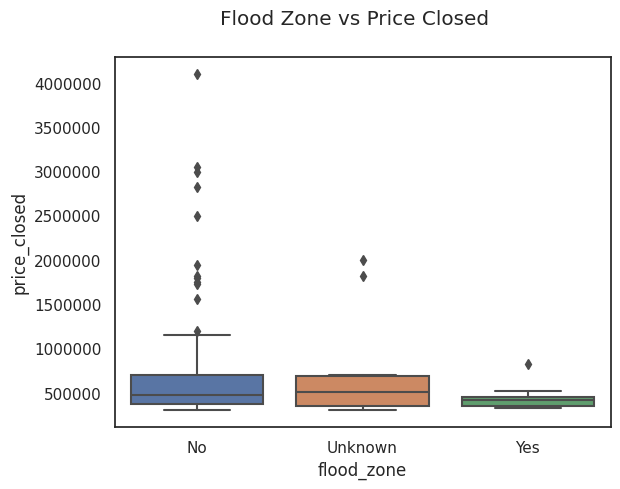

In [75]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Flood Zone vs Price Closed')
sns.boxplot(data=df,x=df["flood_zone"],y=df['price_closed'])

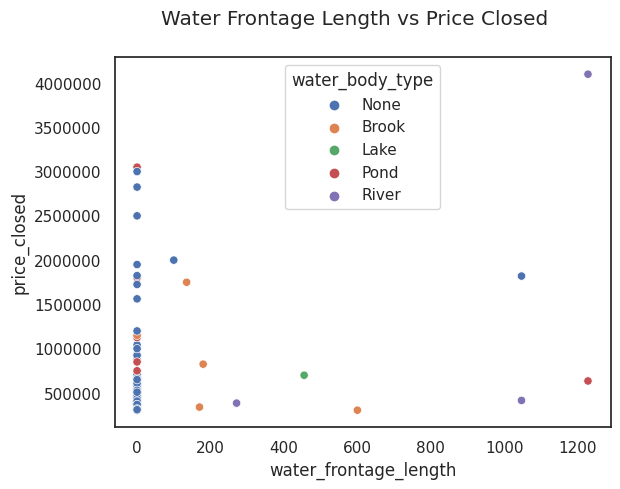

In [76]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Water Frontage Length vs Price Closed')
g = sns.scatterplot(data=df, x=df['water_frontage_length'], y=df['price_closed'], hue = df['water_body_type'])

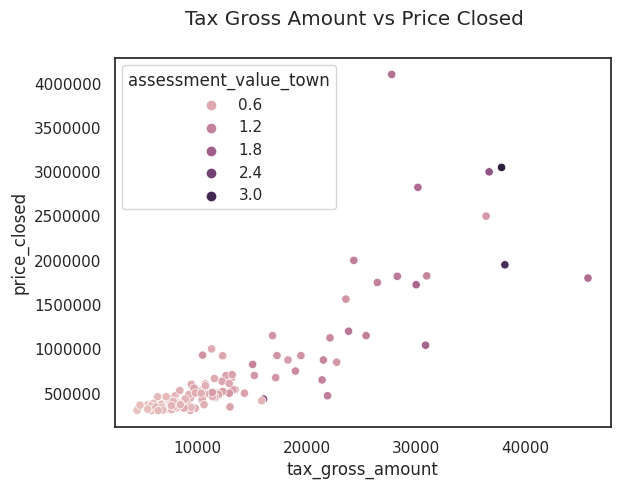

In [77]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Tax Gross Amount vs Price Closed')
g = sns.scatterplot(data=df, x=df['tax_gross_amount'], y=df['price_closed'], hue = df['assessment_value_town'])

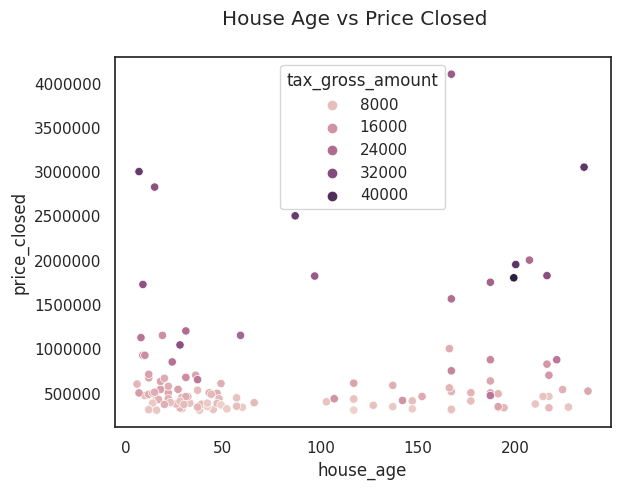

In [78]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('House Age vs Price Closed')
g = sns.scatterplot(data=df, x=df['house_age'], y=df['price_closed'], hue = df['tax_gross_amount'])

<AxesSubplot: xlabel='city', ylabel='price_closed'>

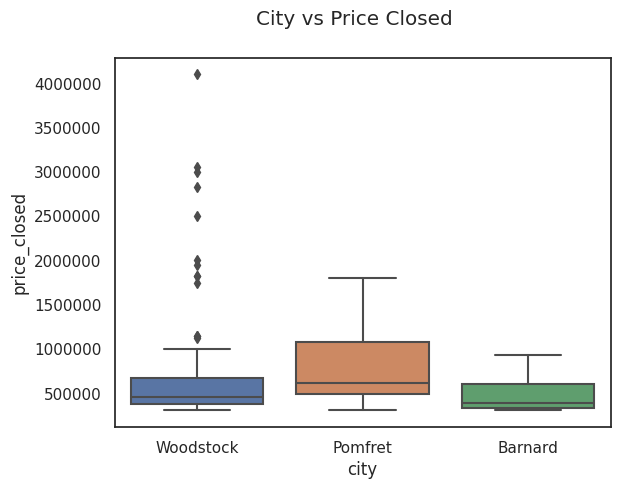

In [79]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('City vs Price Closed')
sns.boxplot(data=df,x=df["city"],y=df['price_closed'])

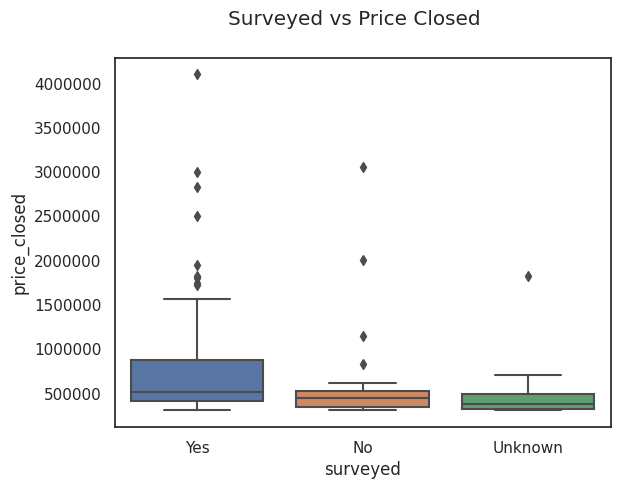

In [80]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Surveyed vs Price Closed')
g = sns.boxplot(data=df, x=df['surveyed'], y=df['price_closed'])

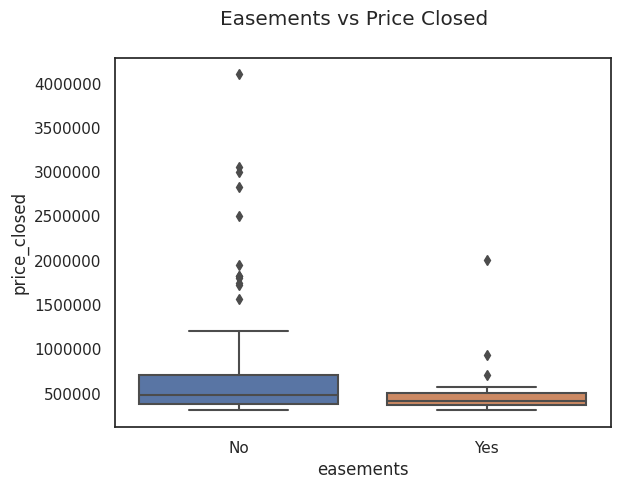

In [81]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Easements vs Price Closed')
g = sns.boxplot(data=df, x=df['easements'], y=df['price_closed'])

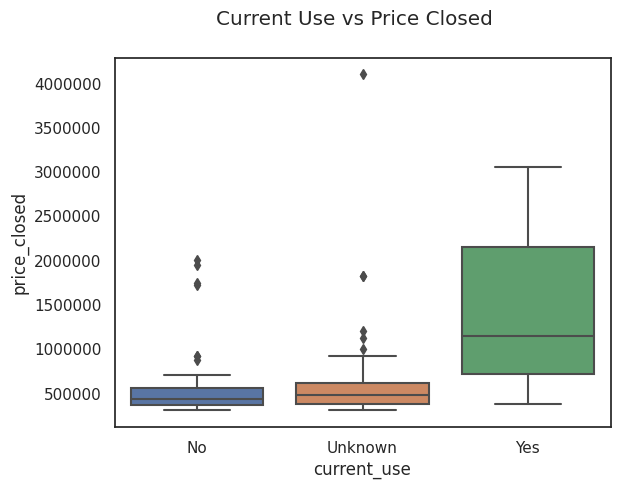

In [82]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Current Use vs Price Closed')
g = sns.boxplot(data=df, x=df['current_use'], y=df['price_closed'])

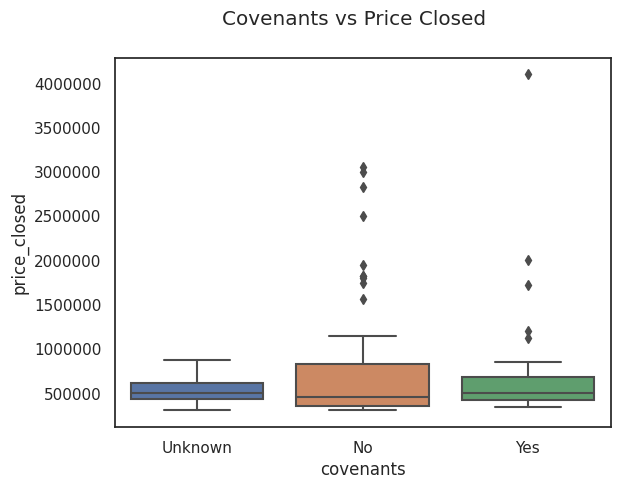

In [83]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
f.suptitle('Covenants vs Price Closed')
g = sns.boxplot(data=df, x=df['covenants'], y=df['price_closed'])

In [84]:
df['rooms_total'].describe()

count    122.000000
mean       9.196721
std        2.471789
min        5.000000
25%        7.000000
50%        9.000000
75%       10.000000
max       19.000000
Name: rooms_total, dtype: float64

In [85]:
df['bedrooms_total'].describe()

count    122.000000
mean       3.598361
std        0.993032
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: bedrooms_total, dtype: float64

In [86]:
#removing outliers for price_closed
df = df[df['price_closed'] < 1316250]

# Machine Learning

# Comparing metrics for different factors

In [87]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


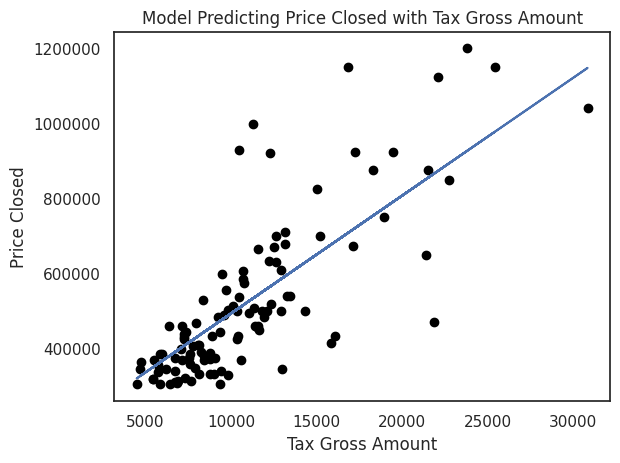

In [88]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
X_train_tga, X_test_tga, Y_train_tga, Y_test_tga = train_test_split(df[['tax_gross_amount']], df[['price_closed']],test_size=0.3, random_state=4)
house_tga_reg = LinearRegression()
house_tga_reg.fit(X_train_tga, Y_train_tga)
tga = df['tax_gross_amount'].to_numpy()
tga = tga.reshape(-1,1)
plt.scatter(df['tax_gross_amount'], df['price_closed'], color='black')
plt.plot(df['tax_gross_amount'], house_tga_reg.predict(tga))
plt.title("Model Predicting Price Closed with Tax Gross Amount")
ax.set_xlabel('Tax Gross Amount')
ax.set_ylabel('Price Closed')
plt.show()

In [89]:
print('Coefficients: \n', house_tga_reg.coef_)
print('Mean squared error: %.2f' % np.mean((house_tga_reg.predict(X_test_tga) - Y_test_tga) ** 2))
print('Variance score: %.2f' % house_tga_reg.score(X_test_tga, Y_test_tga))

Coefficients: 
 [[31.36323151]]
Mean squared error: 7737048542.36
Variance score: 0.82


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 136
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     109 non-null    int64  
 1   bedrooms_total         109 non-null    int64  
 2   baths_total            109 non-null    int64  
 3   acres                  109 non-null    float64
 4   sq_ft_tot_fn           109 non-null    int64  
 5   tax_gross_amount       109 non-null    float64
 6   assessment_value_town  109 non-null    float64
 7   garage_capacity        109 non-null    float64
 8   address                109 non-null    object 
 9   city                   109 non-null    object 
 10  garage_type            109 non-null    object 
 11  year_built             109 non-null    int64  
 12  total_stories          109 non-null    float64
 13  surveyed               109 non-null    object 
 14  water_body_type        109 non-null    object 
 15  water_

In [91]:
# Just tax gross amount
X = df.iloc[:, [5]].values
y = df.iloc[:, 24].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 
model = LinearRegression()  
model.fit(X_train, y_train) 
print(model.intercept_) 
print(model.coef_) 
y_pred = model.predict(X_test)  
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.float_format', '{:.2f}'.format)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Variance score: %.2f' % model.score(X_test, y_test))

180478.892770154
[31.36323151]
Mean Absolute Error: 74820.54455349401
Mean Squared Error: 7737048542.364688
Root Mean Squared Error: 87960.4942139634
Variance score: 0.82


In [92]:
# add in assessment value town
X = df.iloc[:, [5,6]].values
y = df.iloc[:, 24].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 
model = LinearRegression()  
model.fit(X_train, y_train) 
print(model.intercept_) 
print(model.coef_) 
y_pred = model.predict(X_test)  
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.float_format', '{:.2f}'.format)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Variance score: %.2f' % model.score(X_test, y_test))

180482.5035094727
[3.13513854e+01 2.13462470e-04]
Mean Absolute Error: 74820.9280853113
Mean Squared Error: 7737474850.672815
Root Mean Squared Error: 87962.91747476783
Variance score: 0.82


In [93]:
# add in total stories
X = df.iloc[:, [5,6,16]].values
y = df.iloc[:, 24].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 
model = LinearRegression()  
model.fit(X_train, y_train) 
print(model.intercept_) 
print(model.coef_) 
y_pred = model.predict(X_test)  
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.float_format', '{:.2f}'.format)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Variance score: %.2f' % model.score(X_test, y_test))

267598.62876133155
[ 3.23047183e+01  1.10136260e-02 -1.18537983e+04]
Mean Absolute Error: 76764.8655333713
Mean Squared Error: 8582136060.656636
Root Mean Squared Error: 92639.8189800511
Variance score: 0.79


In [94]:
#tax gross amount, assessment value town, rooms total
X = df.iloc[:, [5,6,12]].values
y = df.iloc[:, 24].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 
model = LinearRegression()  
model.fit(X_train, y_train) 
print(model.intercept_) 
print(model.coef_) 
y_pred = model.predict(X_test)  
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.float_format', '{:.2f}'.format)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Variance score: %.2f' % model.score(X_test, y_test))

256967.7585771858
[ 2.99297444e+01  3.68629020e-02 -4.24832449e+04]
Mean Absolute Error: 80122.35093448912
Mean Squared Error: 9100098981.98612
Root Mean Squared Error: 95394.43894685958
Variance score: 0.78


In [95]:
#tax gross amount, assessment value town, baths total
X = df.iloc[:, [5,6,2]].values
y = df.iloc[:, 24].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 
model = LinearRegression()  
model.fit(X_train, y_train) 
print(model.intercept_) 
print(model.coef_) 
y_pred = model.predict(X_test)  
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.float_format', '{:.2f}'.format)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Variance score: %.2f' % model.score(X_test, y_test))

196977.27554127126
[ 3.21589873e+01 -6.30297086e-03 -7.04742889e+03]
Mean Absolute Error: 75273.98881390381
Mean Squared Error: 8010501687.6242
Root Mean Squared Error: 89501.40606506805
Variance score: 0.81


In [96]:
#tax gross amount, assessment value town,sqare footage
X = df.iloc[:, [5,6,4]].values
y = df.iloc[:, 24].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 
model = LinearRegression()  
model.fit(X_train, y_train) 
print(model.intercept_) 
print(model.coef_) 
y_pred = model.predict(X_test)  
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.float_format', '{:.2f}'.format)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Variance score: %.2f' % model.score(X_test, y_test))

237412.76898147096
[ 3.51622928e+01  1.05969555e-04 -3.58337812e+01]
Mean Absolute Error: 74329.63655629192
Mean Squared Error: 8433204306.015614
Root Mean Squared Error: 91832.47958111342
Variance score: 0.80


## Feature Engineering

In [97]:
# add in town
df = pd.concat([df, pd.get_dummies(df['city'], prefix = 'city')], axis=1)
df.drop(['city'], axis=1, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 136
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     109 non-null    int64  
 1   bedrooms_total         109 non-null    int64  
 2   baths_total            109 non-null    int64  
 3   acres                  109 non-null    float64
 4   sq_ft_tot_fn           109 non-null    int64  
 5   tax_gross_amount       109 non-null    float64
 6   assessment_value_town  109 non-null    float64
 7   garage_capacity        109 non-null    float64
 8   address                109 non-null    object 
 9   garage_type            109 non-null    object 
 10  year_built             109 non-null    int64  
 11  total_stories          109 non-null    float64
 12  surveyed               109 non-null    object 
 13  water_body_type        109 non-null    object 
 14  water_frontage_length  109 non-null    int64  
 15  rooms_

In [99]:
#tax gross amount, assessment value town,city
X = df.iloc[:, [5,25,26,27]].values
y = df.iloc[:, 23].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 
model = LinearRegression()  
model.fit(X_train, y_train) 
print(model.intercept_) 
print(model.coef_) 
y_pred = model.predict(X_test)  
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.float_format', '{:.2f}'.format)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Variance score: %.2f' % model.score(X_test, y_test))

146252.23023500462
[ 3.32452859e+01  2.06415917e+04 -4.38949178e+04  2.32533261e+04]
Mean Absolute Error: 73700.9165957447
Mean Squared Error: 7297877934.376462
Root Mean Squared Error: 85427.61810080193
Variance score: 0.83


In [100]:
df = pd.concat([df, pd.get_dummies(df['current_use'], prefix = 'current_use')], axis=1)
df.drop(['current_use'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 136
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     109 non-null    int64  
 1   bedrooms_total         109 non-null    int64  
 2   baths_total            109 non-null    int64  
 3   acres                  109 non-null    float64
 4   sq_ft_tot_fn           109 non-null    int64  
 5   tax_gross_amount       109 non-null    float64
 6   assessment_value_town  109 non-null    float64
 7   garage_capacity        109 non-null    float64
 8   address                109 non-null    object 
 9   garage_type            109 non-null    object 
 10  year_built             109 non-null    int64  
 11  total_stories          109 non-null    float64
 12  surveyed               109 non-null    object 
 13  water_body_type        109 non-null    object 
 14  water_frontage_length  109 non-null    int64  
 15  rooms_

In [101]:
# tax gross amount, assessment value town, city, current use
X = df.iloc[:, [5,24,25,26,27,28,29]].values
y = df.iloc[:, 22].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 
model = LinearRegression()  
model.fit(X_train, y_train) 
print(model.intercept_) 
print(model.coef_) 
y_pred = model.predict(X_test)  
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.float_format', '{:.2f}'.format)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Variance score: %.2f' % model.score(X_test, y_test))

190170.91545620142
[ 3.11963198e+01  1.39495040e+04 -4.35321473e+04  2.95826433e+04
 -5.35553908e+04 -1.70627382e+04  7.06181290e+04]
Mean Absolute Error: 75053.37341827057
Mean Squared Error: 7674537635.670131
Root Mean Squared Error: 87604.43844731916
Variance score: 0.82


## Best Model

In [102]:
X = df.iloc[:, [5,24,25,26]].values
y = df.iloc[:, 22].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4) 
model = LinearRegression()  
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)  
df_regressor = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_regressor)
print(model.intercept_) 
print(model.coef_) 
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pd.set_option('display.float_format', '{:.2f}'.format)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('Variance score: %.2f' % model.score(X_test, y_test))

     Actual  Predicted
0    345000  322182.55
1    370000  352188.40
2    338000  359302.89
3    320000  350792.10
4    460000  380978.82
5    340000  482775.89
6    370000  521972.08
7    305000  362959.87
8    334000  438792.37
9    585000  526127.74
10   305000  382641.08
11   370000  407142.86
12   460000  554519.21
13   630000  589626.23
14   875000  774517.91
15   425000  514325.66
16   515000  506513.02
17   925000  743817.87
18   372500  461798.11
19   332500  458654.45
20   410000  438127.47
21   390000  460368.56
22   610000  598569.22
23   520309  511839.50
24   312000  393944.48
25   459500  548202.61
26   381000  449696.83
27   540000  610338.05
28  1150000 1014534.23
29   924500  816558.56
30   502500  428626.55
31   635000  576727.06
32   375000  470774.34
146252.23023500462
[ 3.32452859e+01  2.06415917e+04 -4.38949178e+04  2.32533261e+04]
Mean Absolute Error: 73700.9165957447
Mean Squared Error: 7297877934.376462
Root Mean Squared Error: 85427.61810080193
Variance score

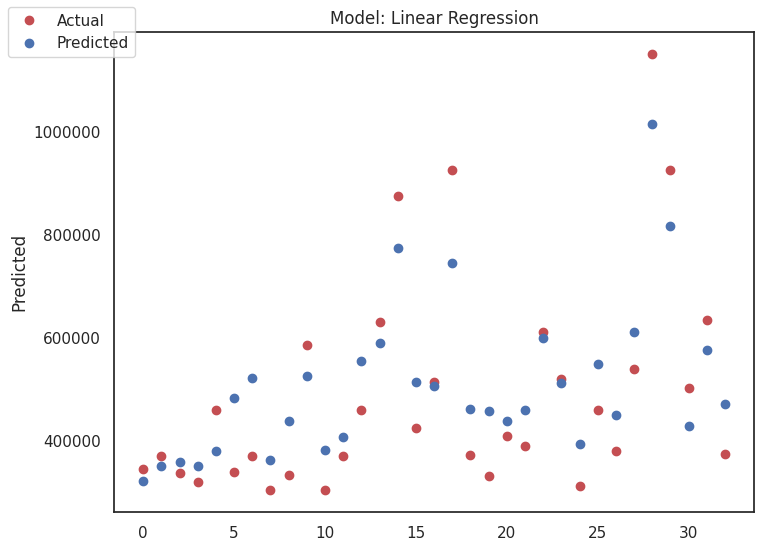

In [103]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(range(len(y_test)),y_test, 'ro')
a1.ticklabel_format(style='plain', axis='both')
a1.plot(range(len(y_pred)), y_pred,'o')
plt.title('Model: Linear Regression')
#a1.ticklabel_format(style='plain', axis='both')
fig.legend(labels = ('Actual','Predicted'),loc='upper left')
plt.show()

## Cross Validation

In [104]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

In [105]:
scores = cross_val_score(model, X, y, cv=6)
print('Cross-validated scores:', scores)
print ('Score:', model.score(X_test, y_test))

Cross-validated scores: [0.39062219 0.62720797 0.46491002 0.80403932 0.3702906  0.52894757]
Score: 0.825530323831283


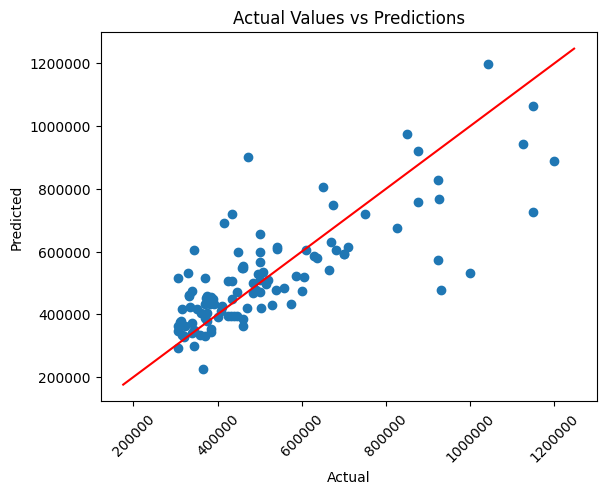

In [2]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
plt.xticks(rotation=45)
left, right = plt.xlim()
bottom, top = plt.ylim()
axlim = (min(bottom, left), max(top, right))
xpoints2 = ypoints2 = np.linspace(axlim[0], axlim[1])
plt.plot(xpoints2, ypoints2, color="r", label="xlim and ylim")
plt.title('Actual Values vs Predictions')
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

## Comparing Different Models

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [108]:
model_gnb = GaussianNB()  
model_gnb.fit(X_train, y_train)
y_pred = model_gnb.predict(X_test)
df_gnb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df_gnb)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % model.score(X_test, y_test))

     Actual  Predicted
0    345000     385000
1    370000     345000
2    338000     345000
3    320000     345000
4    460000     375000
5    340000     435000
6    370000     435000
7    305000     345000
8    334000     345000
9    585000     435000
10   305000     375000
11   370000     375000
12   460000     345000
13   630000     500000
14   875000     700000
15   425000     435000
16   515000     435000
17   925000     345000
18   372500     435000
19   332500     485000
20   410000     345000
21   390000     435000
22   610000     500000
23   520309     700000
24   312000     375000
25   459500     345000
26   381000     435000
27   540000     345000
28  1150000     345000
29   924500     345000
30   502500     485000
31   635000     345000
32   375000     435000
Mean Absolute Error: 136399.72727272726
Mean Squared Error: 50419488044.878784
Root Mean Squared Error: 224542.84233722254
Variance score: 0.83


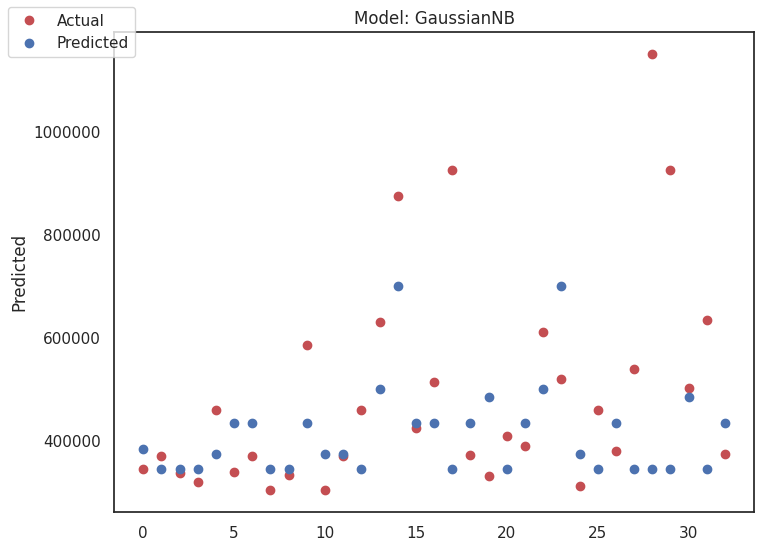

In [109]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(range(len(y_test)),y_test, 'ro')
a1.ticklabel_format(style='plain', axis='both')
a1.plot(range(len(y_pred)), y_pred,'o')
plt.title('Model: GaussianNB')
#a1.ticklabel_format(style='plain', axis='both')
fig.legend(labels = ('Actual','Predicted'),loc='upper left')
plt.show()

In [110]:
model_dtc = DecisionTreeClassifier() 
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test) 
df_dtc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df_dtc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('Variance score: %.2f' % model.score(X_test, y_test))

     Actual  Predicted
0    345000     365000
1    370000     320000
2    338000     357500
3    320000     320000
4    460000     345000
5    340000     600000
6    370000     605914
7    305000     385000
8    334000     409500
9    585000     605914
10   305000     345000
11   370000     460000
12   460000     665000
13   630000     500000
14   875000     675000
15   425000     500000
16   515000     500000
17   925000     675000
18   372500     435000
19   332500     485000
20   410000     409500
21   390000     435000
22   610000     500000
23   520309     485000
24   312000     340000
25   459500     508500
26   381000     370000
27   540000     710000
28  1150000     850000
29   924500     875000
30   502500     330000
31   635000     922800
32   375000     332500
Mean Absolute Error: 102967.78787878787
Mean Squared Error: 18510768977.969696
Root Mean Squared Error: 136054.2868783255
Variance score: 0.83


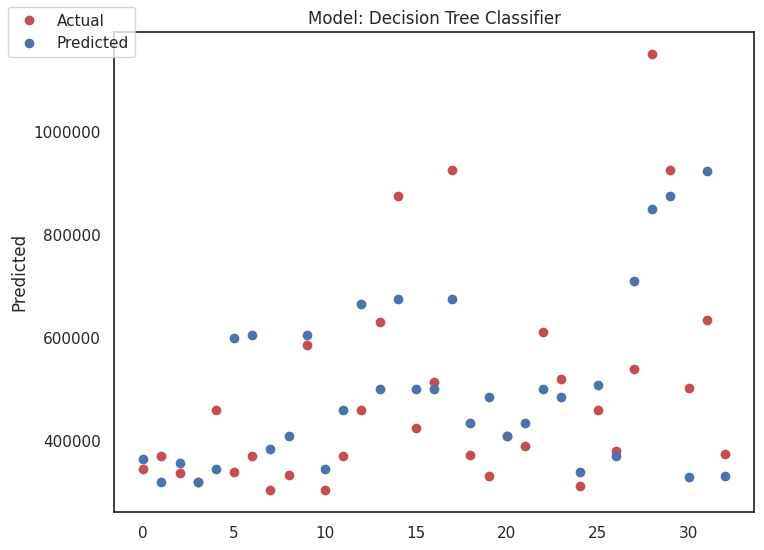

In [111]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(range(len(y_test)),y_test, 'ro')
a1.ticklabel_format(style='plain', axis='both')
a1.plot(range(len(y_pred)), y_pred,'o')
plt.title('Model: Decision Tree Classifier')
#a1.ticklabel_format(style='plain', axis='both')
fig.legend(labels = ('Actual','Predicted'),loc='upper left')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8959ca6f-4ea2-4669-8d08-3b3d511ecb45' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>